### Import libraries

##### Steps to follow:
1. Reading and understanding the data
2. Preparing data for modeling (split into train & test)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on the test data


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# 1. EDA

#### 1.1 - Understand the Dataset

In [2]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
print(lead_data.shape)

(9240, 37)


In [4]:
print(lead_data.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- The majority of the columns have an object data type, which we will convert accordingly.

In [7]:
# Function to print the unique values from the cols
def get_unique_vals(data_set):
    for col in data_set.columns:
        unique_values = data_set[col].unique()
        print(f"'{col}': {unique_values}\n")

get_unique_vals(lead_data)

'Prospect ID': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

'Lead Number': [660737 660728 660727 ... 579545 579538 579533]

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

'Do Not Email': ['No' 'Yes']

'Do Not Call': ['No' 'Yes']

'Converted': [0 1]

'TotalVisits': [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26. 

- In some of the columns, the "Select" value is observed, which might be due to the non-selection of the option. Hence, we can replace the select values with null values.

In [8]:
lead_data = lead_data.replace('Select', pd.NA)

- We have replaced "Select" with null values. Now, we can move ahead with handling missing values.

#### 1.2 - Handle Missing Values

In [9]:
# identifying the null valus in data
print(lead_data.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Identify the null values as a percentage.
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- Drop the columns with null values exceeding 40%.

In [11]:
# Function that will remove the columns having null values based on the cutoff
def drop_null_vals(data_set, cut_off):
    
    empty_vals = list(data_set.columns[100*data_set.isnull().mean() > cut_off])
    print(f"List of columns having more than {cut_off}% empty values: {empty_vals}\n")
    print(f"Total columns: {len(data_set.columns)}")
    print(f"Removed columns: {len(empty_vals)}")
    
    data_set = data_set.drop(empty_vals, axis=1)
    print(f"Remaining columns: {len(data_set.columns)}")
    
    return data_set

lead_data = drop_null_vals(lead_data, 40)


List of columns having more than 40% empty values: ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Total columns: 37
Removed columns: 7
Remaining columns: 30


In [12]:
print(lead_data.shape)

(9240, 30)


In [13]:
print(lead_data.isnull().sum()*100/len(lead_data))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [14]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### 1.3 - Categorical columns analysis

In [15]:
get_unique_vals(lead_data)

'Prospect ID': ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

'Lead Number': [660737 660728 660727 ... 579545 579538 579533]

'Lead Origin': ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

'Lead Source': ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

'Do Not Email': ['No' 'Yes']

'Do Not Call': ['No' 'Yes']

'Converted': [0 1]

'TotalVisits': [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26. 

In [16]:
# List of categorical columns
catagorical_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 
                    'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity']

In [17]:
# Function that will create graph of the variable
def create_plot(col_name, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=col_name, hue='Converted', data=lead_data)
    plt.xticks(rotation=90)
    return plt.show()

- We have created a list of catagorical variables.
- We have created a function to create plot of the variable
- Now we will look into each column one by one for analysis.

**1. Lead Origin**

In [18]:
# Check the unique values of the variable
lead_data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [19]:
# Check the value count of the variable
lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

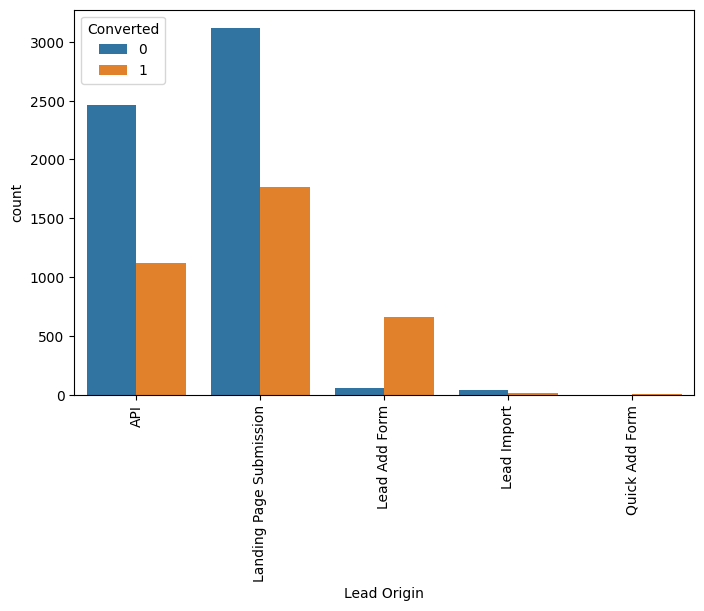

In [20]:
create_plot('Lead Origin', figsize=(8, 5))

**Conclusion:**
1. "Landing page submissions" and "API" have identified the most leads, and the majority of the leads converted from these sources.
2. "Lead Add Form" has a high lead conversion rate but the total identifies leads is less compared to "Landing page submissions" and "API".
3. "Lead Import" and "Quick Add Form" have gathered the least leads and have very low conversion rates.
4. We can focus on improving the conversion rate of "API" and "Landing page submissions".

**2. Lead Source**

In [21]:
# Check the unique values of the variable
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [22]:
# Check the value count of the variable
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- As we can see, there are many lead sources, some of which have collected very few leads.
- Therefore, we will keep the top 5 lead sources in their original form and replace the values of the others with "Others".
- We will also replace the null values with "Others"

In [23]:
# Replace the values with others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google', 'Click2call', 
                                                             'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 
                                                             'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM'], 'Others')


In [28]:
# Replace the null values with others
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Others')

In [29]:
# Check the value count of the variable
lead_data['Lead Source'].value_counts(dropna=False)

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             386
Name: Lead Source, dtype: int64

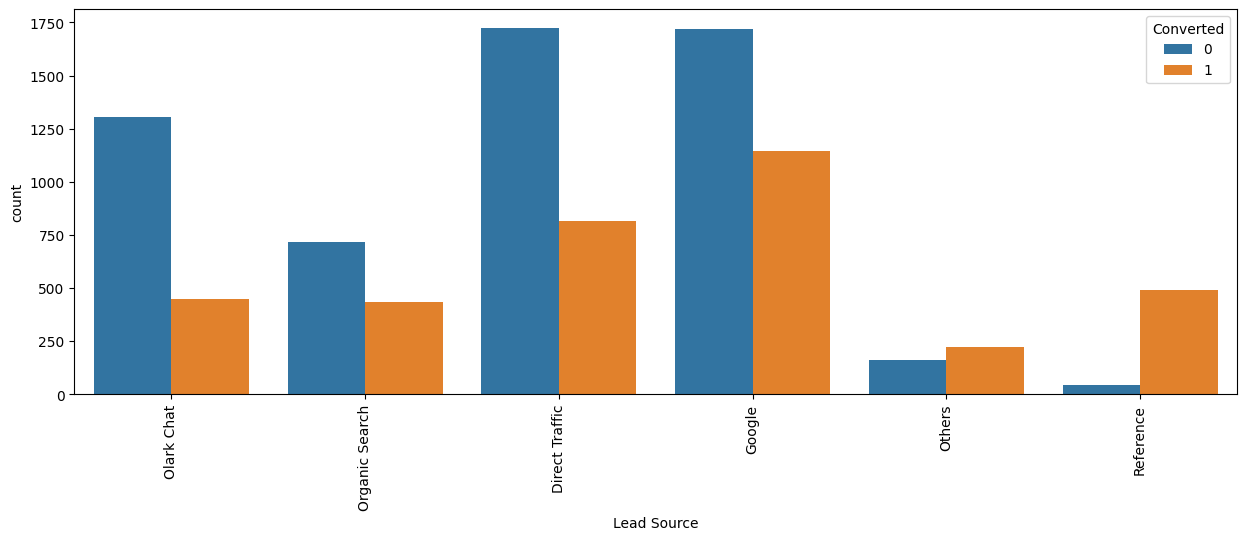

In [31]:
# Create plot for better understanding
create_plot("Lead Source")

**Conclusion:**
1. "Direct traffic" and "Google" have gathered the most leads and have the highest conversion rate.
2. "Olark chat" and "Organic search" have almost similar conversion rates, but the non-conversion rate is lower for "Organic search."
3. "Reference" has the highest conversion rate, and most of the leads successfully converted.
4. In order to improve the conversion rate, we should focus more on "Reference" by providing some kind of discount options to the referrals.
5. "Others" have a very low conversion rate.

In [25]:
# # Printing the unique values present in the data
# for col in lead_data.columns:
#     unique_values = lead_data[col].unique()
#     print(f"'{col}': {unique_values}\n")

In [26]:
# yes_no_columns = []
# for col in lead_data.columns:
#     if lead_data[col].isin(['Yes', 'No', 'yes', 'no']).any():
#         yes_no_columns.append(col)
#         unique_values = lead_data[col].unique()
#         print(f"'{col}': {unique_values}\n")
#     else:
#         pass

In [27]:
# # Converting the values of the variables (Yes - 1, No - 0)
# lead_data[yes_no_columns] = lead_data[yes_no_columns].replace({'Yes': 1, 'No': '0'}).apply(pd.to_numeric)
# lead_data[yes_no_columns].head()